# A


In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno
%matplotlib inline

# Set visualization style and figure size
#plt.rcParams["figure.figsize"] = (12, 8)

In [47]:
# Load the datasets
#df = pd.read_csv('processed/final.csv', parse_dates=['tourney_date'])
df = pd.read_csv('raw/atp2023.csv', parse_dates=['tourney_date'])
print(f"Dataset shape: {df.shape}")
# Display the first few rows
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (2986, 49)

First 5 rows:


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,2023-01-02,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,2023-01-02,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,2023-01-02,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,2023-01-02,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,2023-01-02,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


In [49]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          2986 non-null   object        
 1   tourney_name        2986 non-null   object        
 2   surface             2933 non-null   object        
 3   draw_size           2986 non-null   int64         
 4   tourney_level       2986 non-null   object        
 5   tourney_date        2986 non-null   datetime64[ns]
 6   match_num           2986 non-null   int64         
 7   winner_id           2986 non-null   int64         
 8   winner_seed         1250 non-null   float64       
 9   winner_entry        473 non-null    object        
 10  winner_name         2986 non-null   object        
 11  winner_hand         2986 non-null   object        
 12  winner_ht           2782 non-null   float64       
 13  winner_ioc          2986 non-null 

In [50]:
df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
draw_size,2986.0,64.901541,2.0,32.0,32.0,128.0,128.0,46.31468
tourney_date,2986,2023-06-02 04:03:32.190221056,2023-01-02 00:00:00,2023-03-06 00:00:00,2023-05-29 00:00:00,2023-08-21 00:00:00,2023-11-27 00:00:00,NaN
match_num,2986.0,235.88781,1.0,208.0,275.0,289.0,300.0,82.33363
winner_id,2986.0,145036.088078,100644.0,106331.0,126205.0,200325.0,212051.0,42766.699797
winner_seed,1250.0,7.8216,1.0,3.0,6.0,10.0,32.0,7.204728
winner_ht,2782.0,187.446441,170.0,183.0,188.0,191.0,206.0,6.296849
winner_age,2985.0,26.58928,17.9,23.9,26.1,28.4,43.6,4.350872
loser_id,2986.0,144006.518084,100644.0,106233.0,126205.0,200318.0,212044.0,42450.867025
loser_seed,769.0,9.690507,1.0,4.0,7.0,13.0,32.0,8.099507
loser_ht,2650.0,186.562264,170.0,183.0,185.0,191.0,206.0,6.458224


Columns with missing values:


,Missing Values,Percentage
winner_entry,2513,84.159411
loser_entry,2291,76.724715
loser_seed,2217,74.246484
winner_seed,1736,58.137977
loser_ht,336,11.252512
minutes,232,7.769591
winner_ht,204,6.831882
w_SvGms,171,5.726725
l_1stWon,171,5.726725
l_1stIn,171,5.726725


<Figure size 1400x800 with 0 Axes>

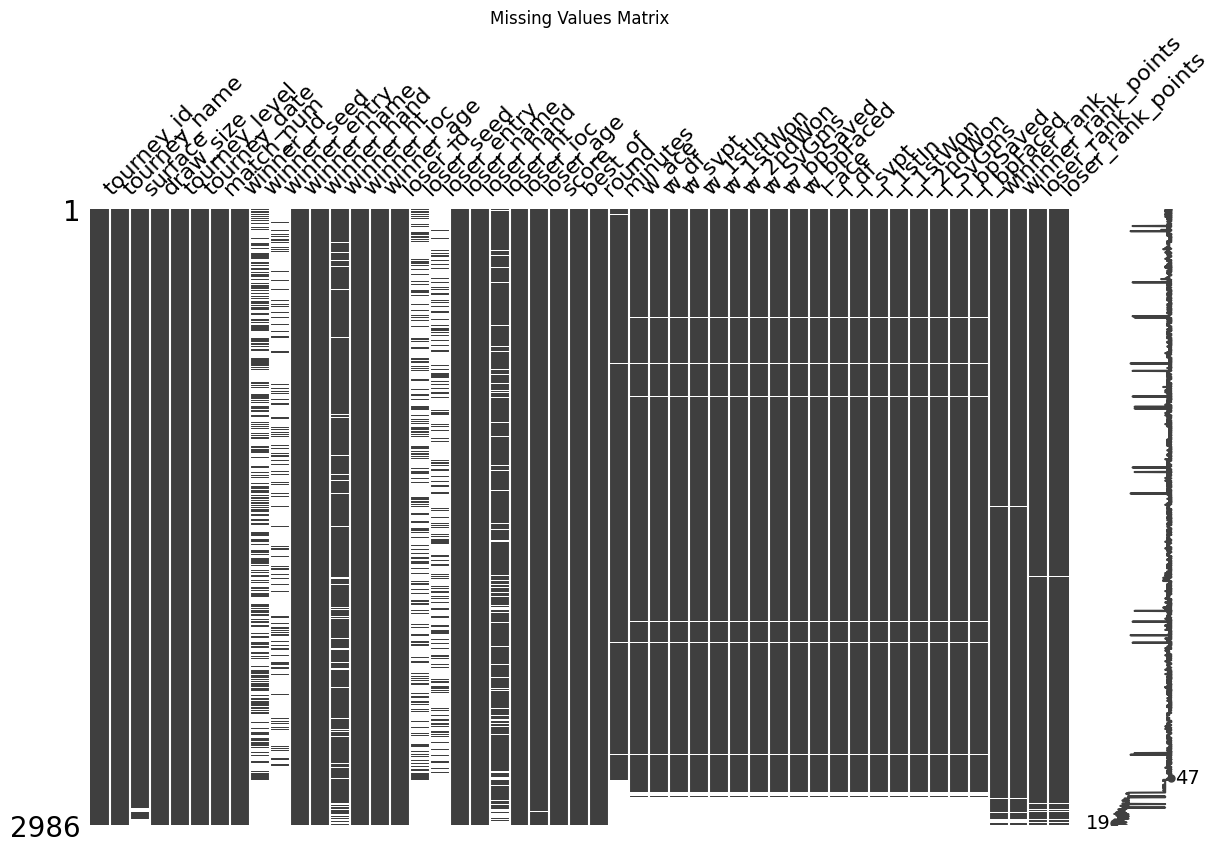

<Figure size 1400x800 with 0 Axes>

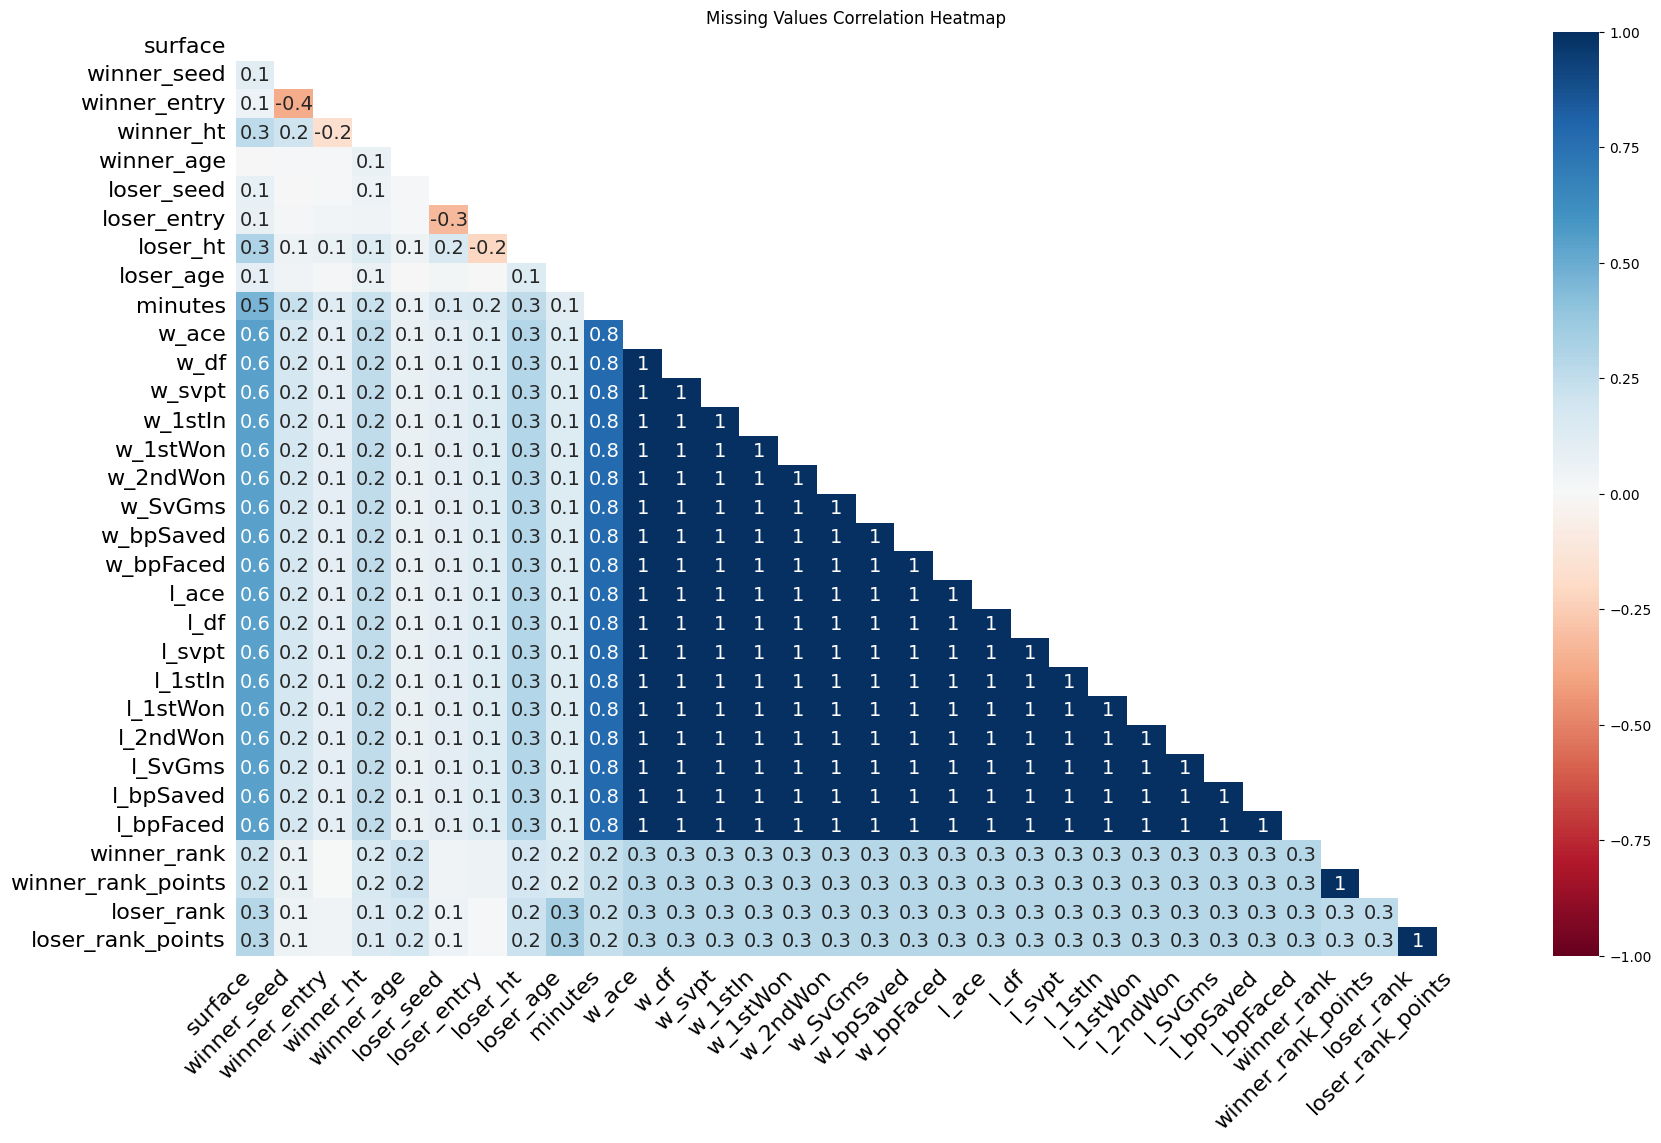

In [51]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
print("Columns with missing values:")
display(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Visualize missing values
plt.figure(figsize=(14, 8))
msno.matrix(df, figsize=(14, 8))
plt.title('Missing Values Matrix')
plt.show()

# Missing values heatmap
plt.figure(figsize=(14, 8))
msno.heatmap(df)
plt.title('Missing Values Correlation Heatmap')
plt.show()

In [52]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
display(df.describe().T)

# Check unique values for categorical columns (selecting a few important ones)
categorical_cols = ['surface', 'tourney_level', 'winner_hand', 'loser_hand', 'winner_ioc', 'loser_ioc']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        display(df[col].value_counts())

Descriptive Statistics:


,count,mean,min,25%,50%,75%,max,std
draw_size,2986.0,64.901541,2.0,32.0,32.0,128.0,128.0,46.31468
tourney_date,2986,2023-06-02 04:03:32.190221056,2023-01-02 00:00:00,2023-03-06 00:00:00,2023-05-29 00:00:00,2023-08-21 00:00:00,2023-11-27 00:00:00,NaN
match_num,2986.0,235.88781,1.0,208.0,275.0,289.0,300.0,82.33363
winner_id,2986.0,145036.088078,100644.0,106331.0,126205.0,200325.0,212051.0,42766.699797
winner_seed,1250.0,7.8216,1.0,3.0,6.0,10.0,32.0,7.204728
winner_ht,2782.0,187.446441,170.0,183.0,188.0,191.0,206.0,6.296849
winner_age,2985.0,26.58928,17.9,23.9,26.1,28.4,43.6,4.350872
loser_id,2986.0,144006.518084,100644.0,106233.0,126205.0,200318.0,212044.0,42450.867025
loser_seed,769.0,9.690507,1.0,4.0,7.0,13.0,32.0,8.099507
loser_ht,2650.0,186.562264,170.0,183.0,185.0,191.0,206.0,6.458224



Unique values in surface:


surface
Hard     1704
Clay      901
Grass     328
Name: count, dtype: int64


Unique values in tourney_level:


tourney_level
A    1548
M     695
G     508
D     220
F      15
Name: count, dtype: int64


Unique values in winner_hand:


winner_hand
R    2575
L     342
U      69
Name: count, dtype: int64


Unique values in loser_hand:


loser_hand
R    2454
L     400
U     132
Name: count, dtype: int64


Unique values in winner_ioc:


winner_ioc
USA    364
FRA    249
RUS    220
ITA    197
ESP    188
      ... 
THA      1
MON      1
URU      1
JAM      1
MAR      1
Name: count, Length: 71, dtype: int64


Unique values in loser_ioc:


loser_ioc
USA    342
FRA    304
AUS    194
ESP    193
ARG    187
      ... 
VIE      2
TUR      1
ZIM      1
LBN      1
URU      1
Name: count, Length: 75, dtype: int64

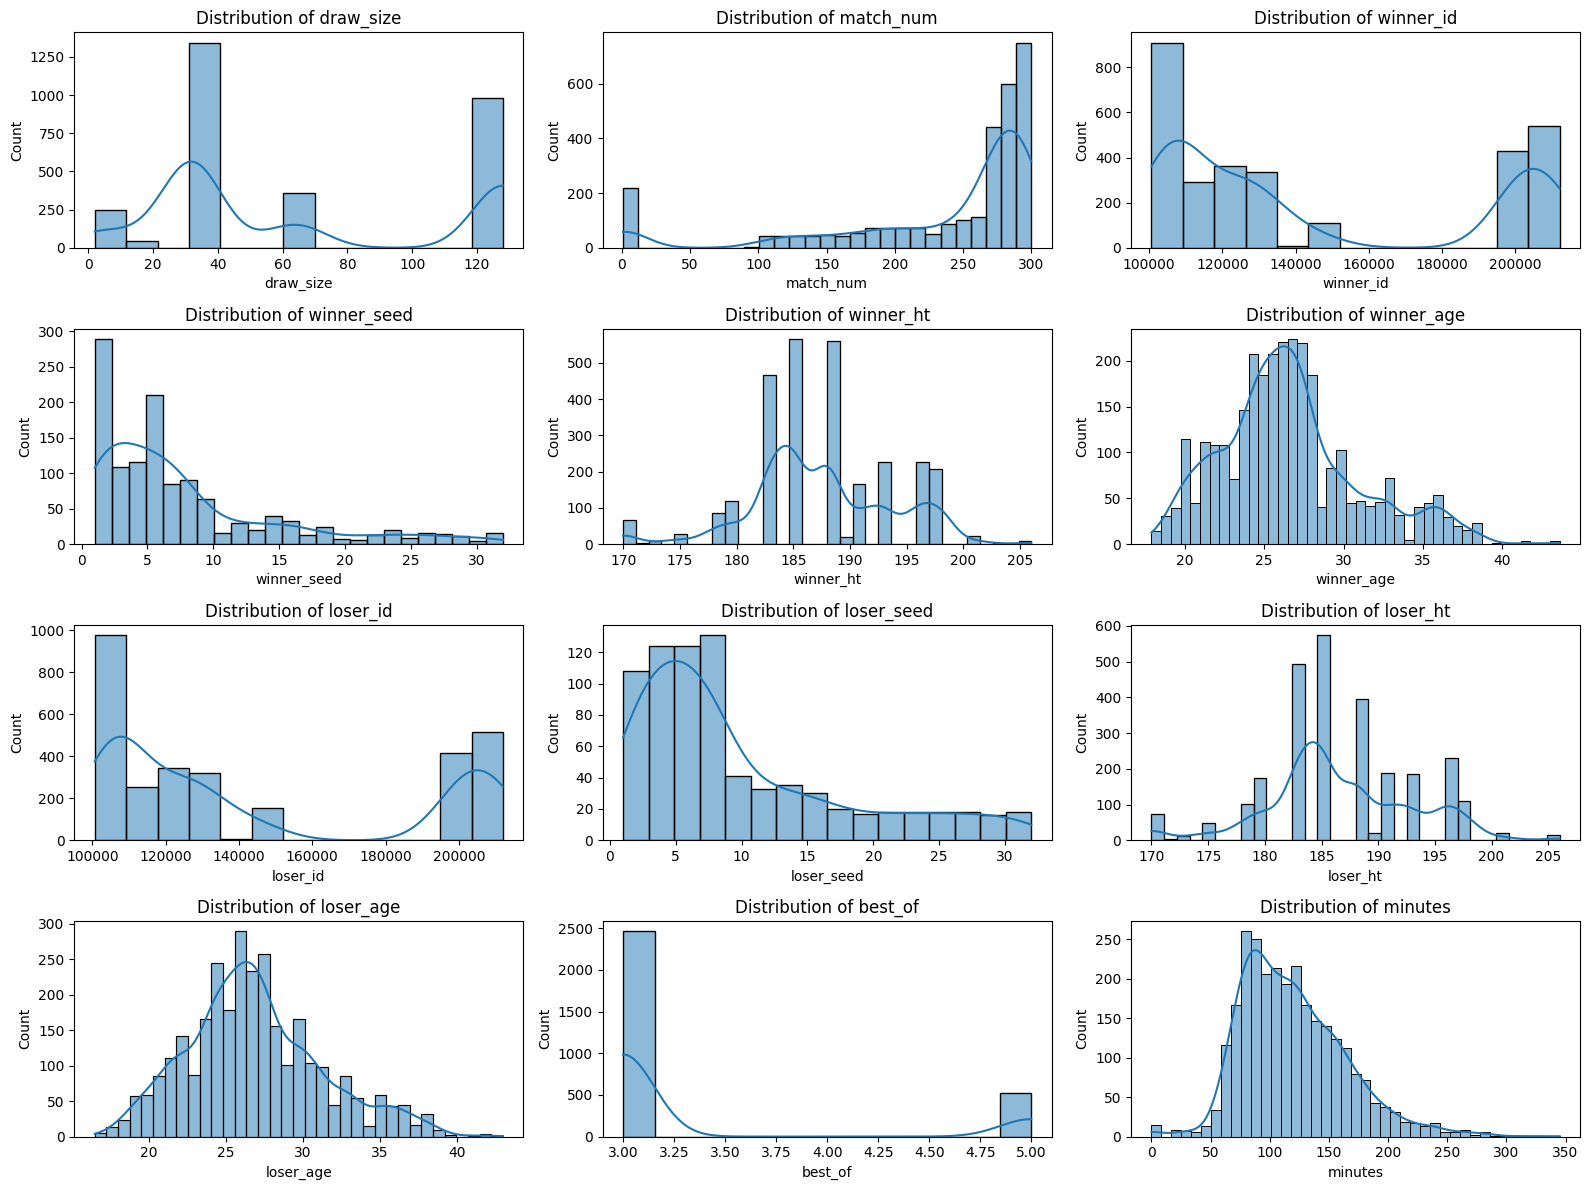

In [53]:
# Analyzing distributions of numerical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Creating histograms for key numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:12]):  # Limit to first 12 numerical columns
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

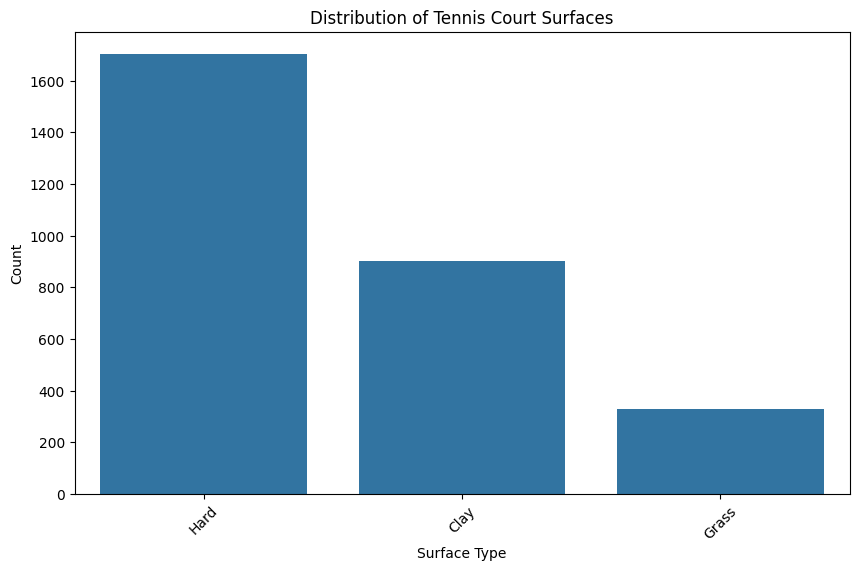

In [54]:
# Analyzing tennis surfaces distribution
if 'surface' in df.columns:
    plt.figure(figsize=(10, 6))
    surface_counts = df['surface'].value_counts()
    sns.barplot(x=surface_counts.index, y=surface_counts.values)
    plt.title('Distribution of Tennis Court Surfaces')
    plt.xlabel('Surface Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

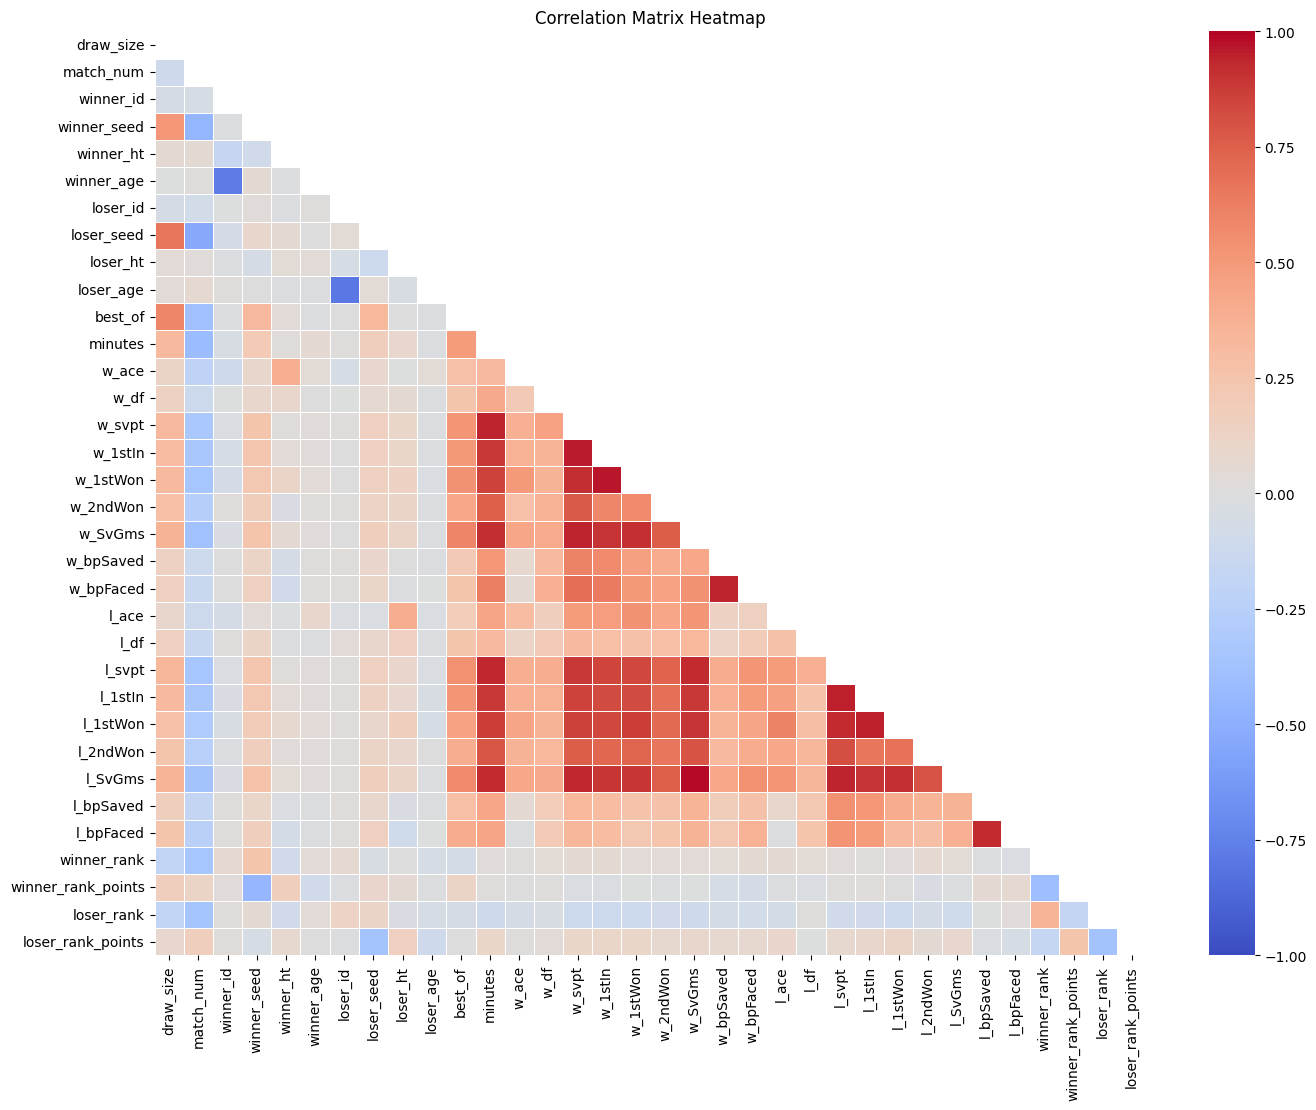

Top correlations:
w_SvGms - l_SvGms: 0.9846
w_1stIn - w_1stWon: 0.9622
w_svpt - w_1stIn: 0.9535
l_1stIn - l_1stWon: 0.9523
l_svpt - l_1stIn: 0.9522
w_svpt - w_SvGms: 0.9427
w_bpSaved - w_bpFaced: 0.9419
l_svpt - l_SvGms: 0.9395
minutes - w_svpt: 0.9386
w_svpt - l_SvGms: 0.9345
minutes - l_svpt: 0.9316
l_bpSaved - l_bpFaced: 0.9263
l_svpt - l_1stWon: 0.9262
w_SvGms - l_svpt: 0.9259
minutes - l_SvGms: 0.9234
minutes - w_SvGms: 0.9192
w_svpt - w_1stWon: 0.9189
w_1stWon - w_SvGms: 0.9104
l_1stWon - l_SvGms: 0.9099
w_1stIn - w_SvGms: 0.9043


In [55]:
# Correlation analysis
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display top correlations
def get_top_correlations(corr_matrix, n=20):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                              corr_matrix.iloc[i, j]))
    
    return sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:n]

top_corrs = get_top_correlations(corr_matrix)
print("Top correlations:")
for var1, var2, corr in top_corrs:
    print(f"{var1} - {var2}: {corr:.4f}")

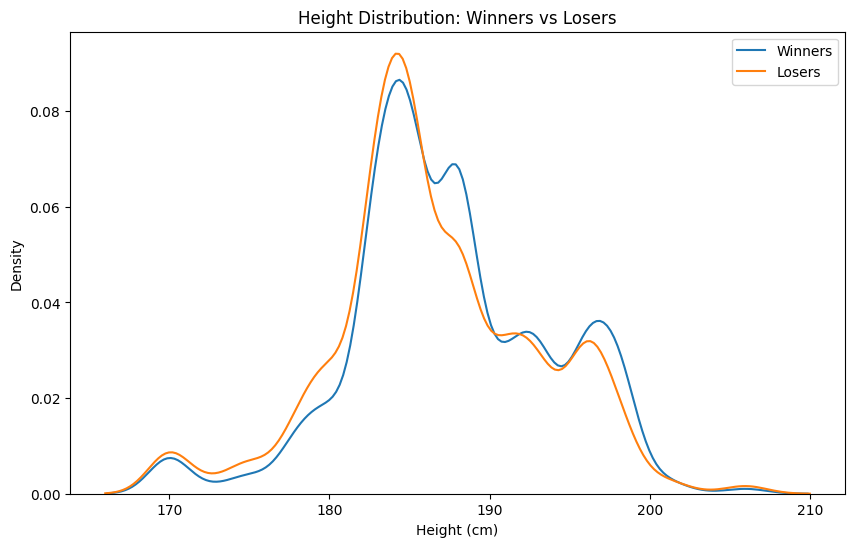

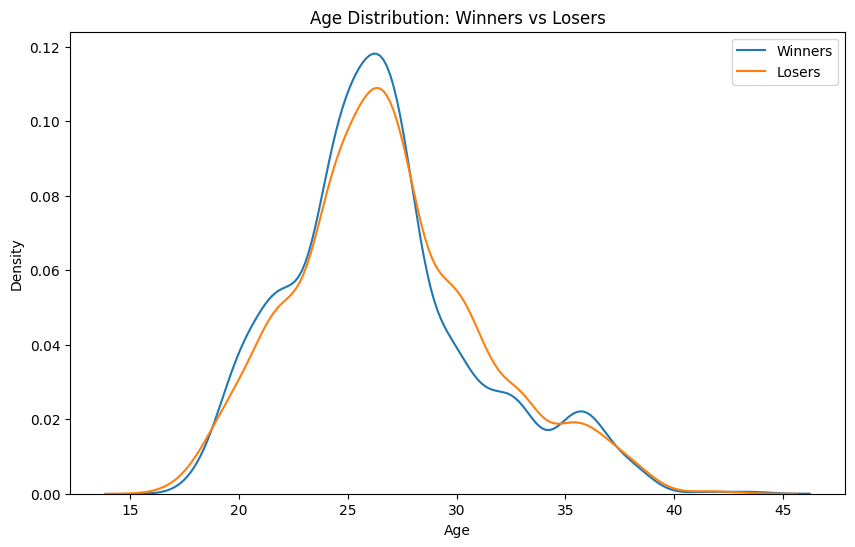

In [56]:
# Analysis of winners vs losers statistics
# Check for columns that may contain winner and loser statistics
winner_cols = [col for col in df.columns if col.startswith('winner_')]
loser_cols = [col for col in df.columns if col.startswith('loser_')]

# Compare heights of winners and losers
if 'winner_ht' in df.columns and 'loser_ht' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['winner_ht'].dropna(), label='Winners')
    sns.kdeplot(df['loser_ht'].dropna(), label='Losers')
    plt.title('Height Distribution: Winners vs Losers')
    plt.xlabel('Height (cm)')
    plt.legend()
    plt.show()

# Compare ages of winners and losers
if 'winner_age' in df.columns and 'loser_age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['winner_age'].dropna(), label='Winners')
    sns.kdeplot(df['loser_age'].dropna(), label='Losers')
    plt.title('Age Distribution: Winners vs Losers')
    plt.xlabel('Age')
    plt.legend()
    plt.show()

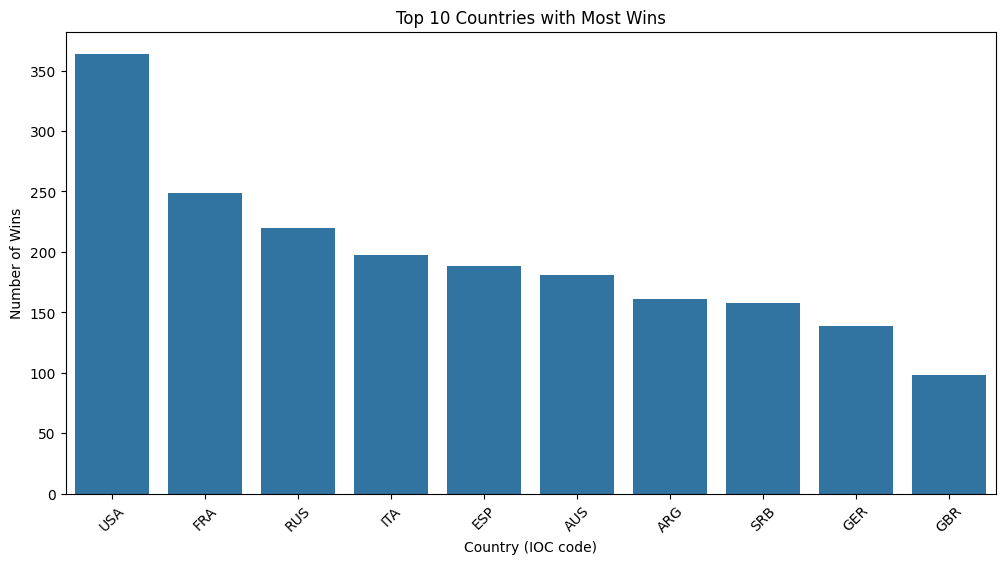

In [57]:
# Analysis by country (IOC code)
if 'winner_ioc' in df.columns:
    top_countries = df['winner_ioc'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_countries.index, y=top_countries.values)
    plt.title('Top 10 Countries with Most Wins')
    plt.xlabel('Country (IOC code)')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.show()

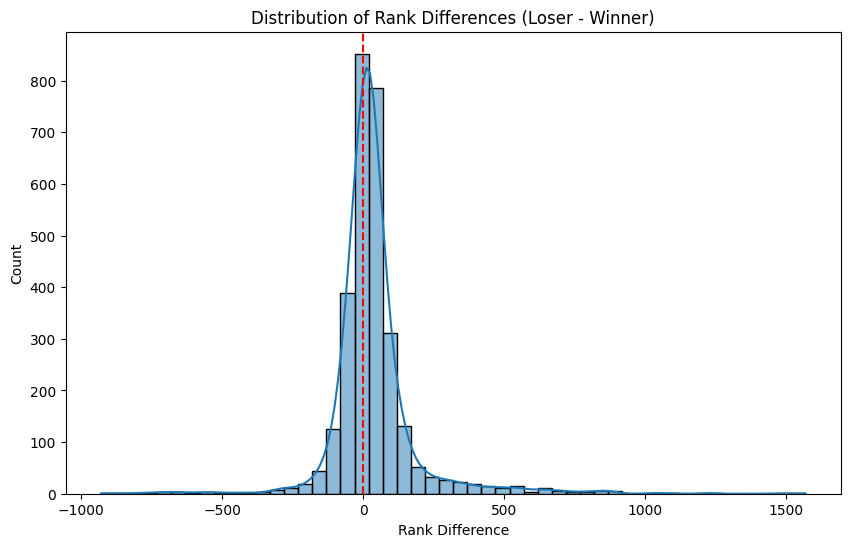

Higher ranked player win rate: 0.6330
Lower ranked player win rate: 0.3670


In [58]:
# Win probability analysis based on rankings (if available)
if 'winner_rank' in df.columns and 'loser_rank' in df.columns:
    df['rank_diff'] = df['loser_rank'] - df['winner_rank']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['rank_diff'].dropna(), bins=50, kde=True)
    plt.title('Distribution of Rank Differences (Loser - Winner)')
    plt.xlabel('Rank Difference')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.show()
    
    # Calculate win rate when higher ranked (negative rank_diff means winner had worse rank)
    higher_ranked_wins = (df['rank_diff'] > 0).sum()
    lower_ranked_wins = (df['rank_diff'] < 0).sum()
    
    print(f"Higher ranked player win rate: {higher_ranked_wins/(higher_ranked_wins+lower_ranked_wins):.4f}")
    print(f"Lower ranked player win rate: {lower_ranked_wins/(higher_ranked_wins+lower_ranked_wins):.4f}")

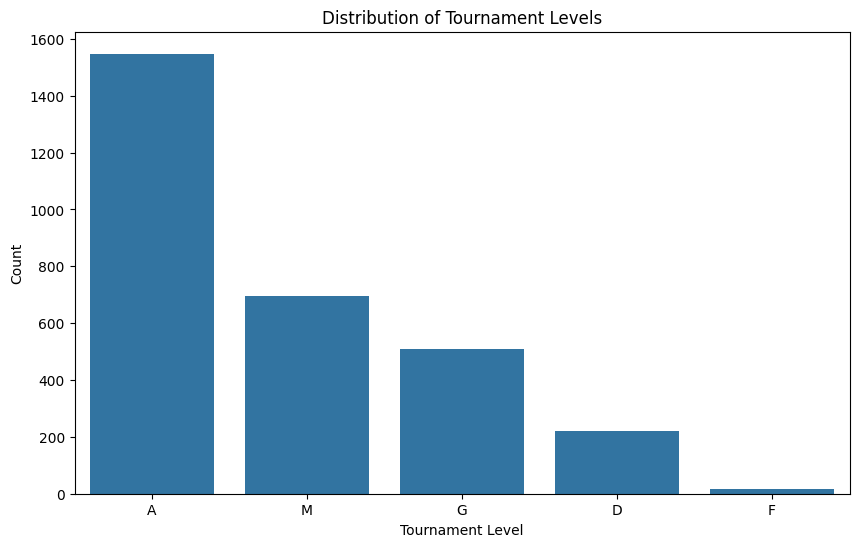

Tournament Levels:
G = Grand Slam
M = Masters 1000
A = ATP Tour 500 and 250 level events
C = Challenger events
S = Satellite events
F = ITF Futures events


In [59]:
# Analysis by tournament level
if 'tourney_level' in df.columns:
    plt.figure(figsize=(10, 6))
    level_counts = df['tourney_level'].value_counts()
    sns.barplot(x=level_counts.index, y=level_counts.values)
    plt.title('Distribution of Tournament Levels')
    plt.xlabel('Tournament Level')
    plt.ylabel('Count')
    plt.show()
    
    # Explanation of tournament levels
    print("Tournament Levels:")
    print("G = Grand Slam")
    print("M = Masters 1000")
    print("A = ATP Tour 500 and 250 level events")
    print("C = Challenger events")
    print("S = Satellite events")
    print("F = ITF Futures events")

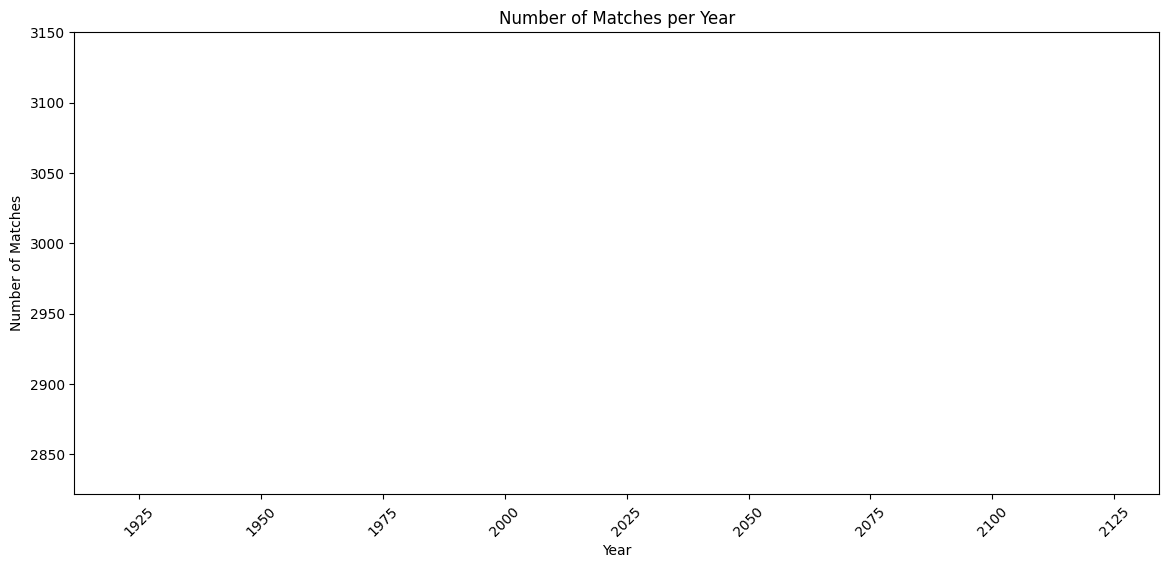

In [60]:
# Time series analysis (if date information is available)
if 'tourney_date' in df.columns:
    # Convert date format (YYYYMMDD) to datetime
    df['date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
    
    # Extract year
    df['year'] = df['date'].dt.year
    
    # Plot matches per year
    plt.figure(figsize=(14, 6))
    year_counts = df['year'].value_counts().sort_index()
    sns.lineplot(x=year_counts.index, y=year_counts.values)
    plt.title('Number of Matches per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=45)
    plt.show()

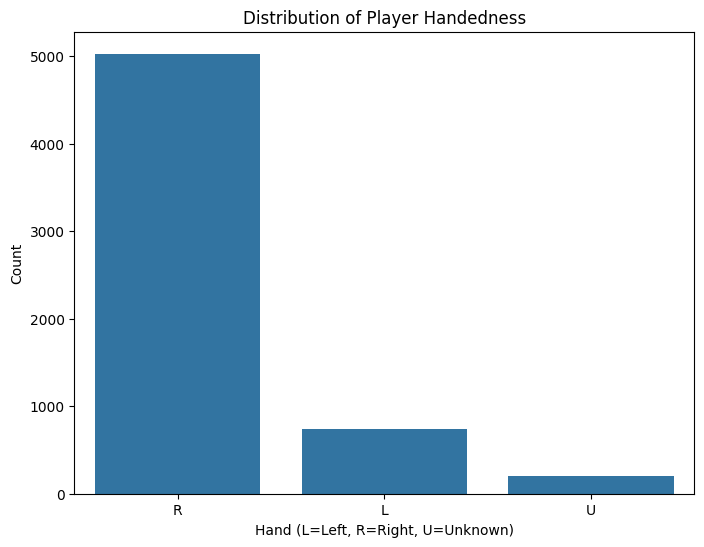

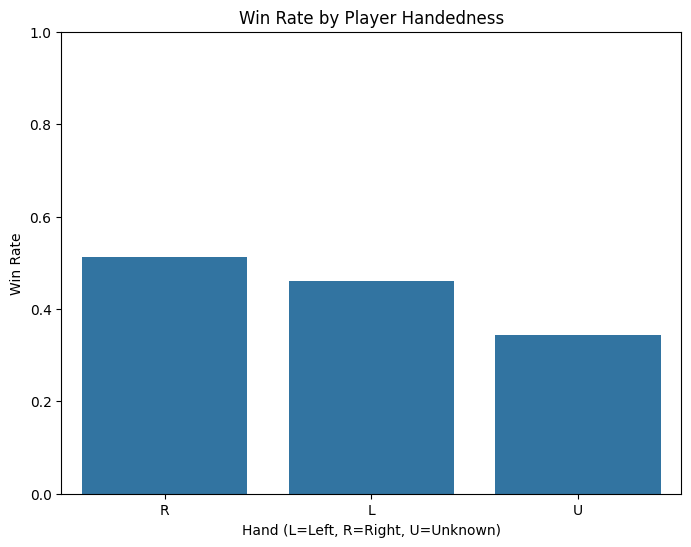

In [61]:
# Analysis of player handedness
if 'winner_hand' in df.columns and 'loser_hand' in df.columns:
    # Combined hand distribution
    all_hands = pd.concat([
        df['winner_hand'].rename('hand'),
        df['loser_hand'].rename('hand')
    ])
    
    plt.figure(figsize=(8, 6))
    hand_counts = all_hands.value_counts()
    sns.barplot(x=hand_counts.index, y=hand_counts.values)
    plt.title('Distribution of Player Handedness')
    plt.xlabel('Hand (L=Left, R=Right, U=Unknown)')
    plt.ylabel('Count')
    plt.show()
    
    # Win rate by handedness
    hand_wins = df['winner_hand'].value_counts()
    hand_losses = df['loser_hand'].value_counts()
    
    # Create dataframe for win percentage
    hand_stats = pd.DataFrame({
        'wins': hand_wins,
        'losses': hand_losses
    }).fillna(0)
    
    hand_stats['total'] = hand_stats['wins'] + hand_stats['losses']
    hand_stats['win_rate'] = hand_stats['wins'] / hand_stats['total']
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=hand_stats.index, y=hand_stats['win_rate'])
    plt.title('Win Rate by Player Handedness')
    plt.xlabel('Hand (L=Left, R=Right, U=Unknown)')
    plt.ylabel('Win Rate')
    plt.ylim(0, 1)
    plt.show()

<Figure size 1200x1000 with 0 Axes>

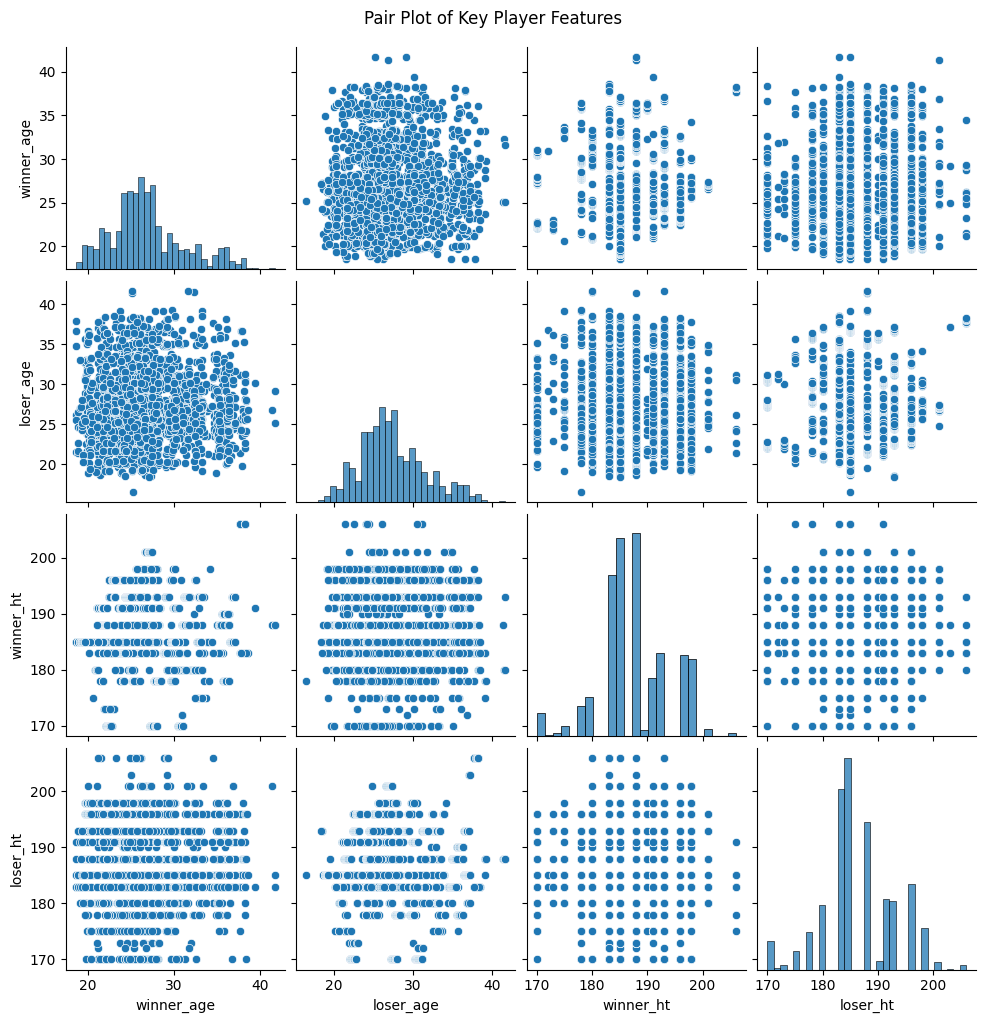

In [62]:
# Pair plot of selected key numerical features
selected_features = ['winner_age', 'loser_age', 'winner_ht', 'loser_ht']
features_present = [col for col in selected_features if col in df.columns]

if len(features_present) > 1:
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[features_present].dropna())
    plt.suptitle('Pair Plot of Key Player Features', y=1.02)
    plt.show()

In [63]:
# Summary of findings
print("Summary of Data Exploration:")
print("--------------------------")
print(f"1. Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

missing_cols = missing_data[missing_data['Missing Values'] > 0]
print(f"2. There are {len(missing_cols)} columns with missing values")

if 'surface' in df.columns:
    surfaces = df['surface'].value_counts()
    dominant_surface = surfaces.index[0]
    print(f"3. Most common playing surface: {dominant_surface} ({surfaces.iloc[0]} matches)")

if 'winner_hand' in df.columns:
    right_handed = (df['winner_hand'] == 'R').sum() + (df['loser_hand'] == 'R').sum()
    left_handed = (df['winner_hand'] == 'L').sum() + (df['loser_hand'] == 'L').sum()
    total_hands = right_handed + left_handed
    print(f"4. Handedness distribution: Right-handed: {right_handed/total_hands:.1%}, Left-handed: {left_handed/total_hands:.1%}")

# Additional insights would be added based on actual data exploration results

Summary of Data Exploration:
--------------------------
1. Dataset contains 2986 rows and 52 columns
2. There are 32 columns with missing values
3. Most common playing surface: Hard (1704 matches)
4. Handedness distribution: Right-handed: 87.1%, Left-handed: 12.9%
